In [2]:
from __future__ import division
from utils import *
from functions import *
from numba import autojit
%matplotlib inline

%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
# load classes
gr = GRAPH()

In [5]:
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
matplotlib.rc('axes', labelsize = 10)
matplotlib.rc('axes', titlesize = 10)
matplotlib.rc('lines', linewidth=2)

In [13]:
column_names =['gammaC','nuEI','corI', 'spike','non-burst','burst', 'freq','power']
# path = os.path.expanduser("/Users/GP1514/Dropbox/ICL-2014/Code/C-Code/cortex/data/_cortex_fft_gp_1.csv")
path = os.path.expanduser("/Users/GP1514/Dropbox/ICL-2014/Code/C-Code/cortex/data/_data_6-wii500-n2500-r08.csv")
path = os.path.expanduser("/Users/GP1514/Dropbox/ICL-2014/Code/C-Code/cortex/data/_data_IAF-wii500-n2500-r08-s60.csv")

# path = os.path.expanduser("/Users/GP1514/Dropbox/ICL-2014/Code/C-Code/cortex/data/_data_33bis-wii500-n1000-r08-s60.csv")


# path = '/Users/guillaume/Downloads/bursts_val-c40_.csv'
df = pd.read_csv(path, names= column_names ,  dtype ='float32' , sep=";")
df = df.fillna(10)
print(df.head())
df= df[(df['nuEI']<200)]
len(pd.unique(df.nuEI.ravel()))

extent = [np.min(df['gammaC']), np.max(df['gammaC']), np.min(df['nuEI']), np.max(df['nuEI'])]

   gammaC  nuEI      corI     spike  non-burst     burst       freq     power
0       0    36  0.003771  0.014002   0.009241  0.033034  44.518299  0.000349
1       0    30  0.003655  0.013514   0.009307  0.029135  37.873798  0.000286
2       0    38  0.003793  0.014136   0.009236  0.033909  46.511600  0.000335
3       0    32  0.003671  0.013671   0.009285  0.030228  34.219299  0.000386
4       0    34  0.003659  0.013823   0.009285  0.031467  34.551498  0.000344


/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


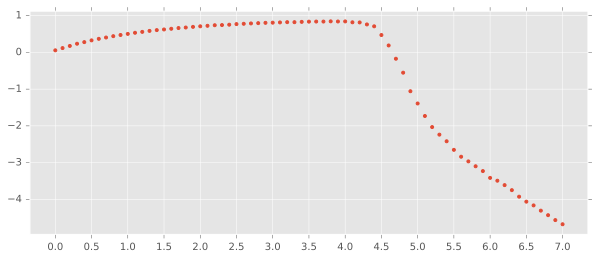

In [14]:
dv = df[ (df['nuEI']==50)]
dv['ratio'] =((dv['burst'])/dv['non-burst'])
dv['ratio'] = (dv['ratio']).apply(lambda x: (5-x)/5)
vals = dv[['gammaC', 'ratio']].get_values()
plt.plot(vals[:,0],vals[:,1], '.')

In [15]:
np.min(df['gammaC'])

0.0

In [16]:
# c=0
# figsize = (10,8)
# ###################################
# # spiking
# ###################################
# dataframe = df[(df['freq']<10000)]
# title = r'Phase state diagram $spiking$'
# filename = "global_gap_junctions_c%d_spiking.pdf" %c
# column = 'non-burst'
# fig = plt.figure(figsize=figsize)
# ax = fig.add_subplot(111)
# plotDiagram(fig, ax, dataframe, title, column, filename)

# ###################################
# # bursting
# ###################################
# dataframe = df[(df['freq']<10000)]
# title = r'Phase state diagram $bursting$'
# filename = "global_gap_junctions_c%d_bursting.pdf" %c
# column = 'burst'
# fig = plt.figure(figsize=figsize)
# ax = fig.add_subplot(111)
# plotDiagram(fig, ax, dataframe, title, column, filename)

# ###################################
# # ratio
# ###################################
# df_sliced = df[(df['freq']<10000) & (df['burst']>0.00001)]
# df_sliced['ratio'] =((df_sliced['burst'])/df_sliced['non-burst']).apply(np.log10)
# dataframe = df_sliced
# title = r'Phase state diagram $ratio bursting/spiking$'
# filename = "global_gap_junctions_c%d_ratio.pdf"
# column = 'ratio'
# fig = plt.figure(figsize=figsize)
# ax = fig.add_subplot(111)
# plotDiagram(fig, ax, dataframe, title, column, filename)

# # ###################################
# # # corI
# # ###################################
# # dataframe = df[(df['freq']<1000)]
# # title = r'Phase state diagram $corI$')
# # filename = "global_gap_junctions_c%d_corI.pdf" %c
# # column = 'corI'
# # fig = plt.figure(figsize=figsize)
# # ax = fig.add_subplot(111)
# # plotDiagram(fig, ax, dataframe, title, column, filename)

# ###################################
# # power
# ###################################
# dataframe = df[(df['freq']<10000)]
# ttl = r'Phase state diagram $P_dB(f)$'
# filename = "global_gap_junctions_c%d_power.pdf" %c
# column = 'power'
# fig = plt.figure(figsize=figsize)
# ax = fig.add_subplot(111)
# plotDiagram(fig, ax, dataframe, ttl, column, filename, front=False)

# ###################################
# # power freq
# ###################################
# dataframe = df[(df['freq']<10000) & (df['power']>0.1)]
# title = r'Phase state diagram $freq  Pdb>0.1$'
# filename = "global_gap_junctions_c%d_power_freq.pdf" %c
# column = 'freq'
# fig = plt.figure(figsize=figsize)
# ax = fig.add_subplot(111)
# plotDiagram(fig, ax, dataframe, title, column, filename, front=False)

(85, 71)


NameError: name 'Z' is not defined

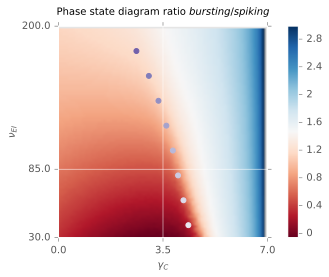

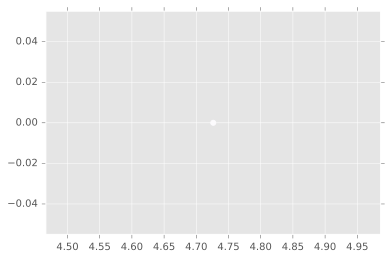

In [17]:
c=0
figsize = (6,4)
fig = plt.figure(figsize=figsize)
gridsize=60
# ###################################
# # spiking
# ###################################
# dataframe = df[(df['freq']<1000)]
# title = r'Phase state diagram $spiking$'
# filename = "global_gap_junctions_c%d_spiking.pdf" %c
# column = 'non-burst'
# ax = fig.add_subplot(231)
# gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize=gridsize )

# ###################################
# # bursting
# ###################################
# dataframe = df[(df['freq']<1000)]
# title = r'Phase state diagram $bursting$'
# filename = "global_gap_junctions_c%d_bursting.pdf" %c
# dataframe['logburst'] =(dataframe['burst']).apply(np.log10)
# column = 'logburst'
# ax = fig.add_subplot(232)
# gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize=gridsize )

# ###################################
# # ratio
# ###################################
# df_sliced = df[(df['freq']<1000) & (df['burst']>0.00001)]
# df_sliced['ratio'] =((df_sliced['burst'])/df_sliced['non-burst']).apply(np.log10)
# dataframe = df_sliced
# title = r'Phase state diagram ratio $bursting/spiking$'
# filename = "global_gap_junctions_c%d_ratio.pdf"
# column = 'ratio'
# ax = fig.add_subplot(233)
# gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize=gridsize )

# # ###################################
# # # corI
# # ###################################
# # dataframe = df[(df['freq']<1000)]
# # title = r'Phase state diagram $corI$')
# # filename = "global_gap_junctions_c%d_corI.pdf" %c
# # column = 'corI'
# # fig = plt.figure(figsize=figsize)
# # ax = fig.add_subplot(111)
# # plotDiagram(fig, ax, dataframe, title, column, filename)

# ###################################
# # power
# ###################################
# dataframe = df[(df['freq']<1000)]
# ttl = r'Phase state diagram $P_dB(f)$'
# filename = "global_gap_junctions_c%d_power.pdf" %c
# dataframe['logpower'] =(dataframe['power']).apply(np.log10)
# column = 'logpower'
# ax = fig.add_subplot(234)
# gr.plotDiagram(fig, ax, dataframe, ttl, column, filename, save=None, front=False, gridsize=gridsize )

# ###################################
# # power freq
# ###################################
# dataframe = df[(df['freq']<1000)]
# dataframe['logpower'] =(dataframe['power']).apply(np.log10)
# dataframe['freq']=dataframe['freq'].fillna(0)
# dataframe['freq'] =(dataframe[['freq','logpower']]).apply(lambda x: x[0]*(x[1]>-1)*1, axis=1)

# title = r'Phase state diagram $freq  Pdb>0.1$'
# filename = "global_gap_junctions_c%d_power_freq.pdf" %c
# column = 'freq'
# ax = fig.add_subplot(235)
# gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None,  front=False, gridsize=gridsize )
# plt.tight_layout()
# plt.savefig(DIRECTORY + 'all-diagrams.pdf')
# plt.savefig(DIRECTORY + 'all-diagrams')

###################################
# ratio
###################################
df_sliced = df[(df['freq']<1000) & (df['burst']>0.00001)]
g0 = 7
df_sliced['non-burst'] = (df_sliced[['spike', 'gammaC']]).apply(lambda x: x[0]*((g0-x[1])/g0)**1, axis=1)
df_sliced['ratio'] =((df_sliced['burst'])/df_sliced['non-burst']).apply(np.log10)
dataframe = df_sliced
title = r'Phase state diagram ratio $bursting/spiking$'
filename = "global_gap_junctions_ratio_corr.pdf"
column = 'ratio'
ax = fig.add_subplot(111)
for S in range(0,200,20):
    cycle  = np.load('/Users/GP1514/Dropbox/0000 - PhD/figures/20160113/' + 'cycle-%d.npy'%S)
    ax.plot([np.mean(cycle[500:600,0])], [S], '.', markersize=10, color=plt.cm.Purples(S))
gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=True, gridsize=gridsize, extent = extent, cmap = plt.cm.RdBu )
df_sliced['non-burst'].head()

fig= plt.figure(figsize = (6,4))
df_sliced = df[(df['freq']<1000) & (df['burst']>0.00001)]
dataframe = df_sliced
dataframe['logpower'] =(dataframe['power']).apply(np.log10)
title = r'Phase state diagram $P_{dB}(f)$'
filename = "logpower_cycle.pdf"
column = 'logpower'
ax = fig.add_subplot(111)
for S in range(0,200,20):
    cycle  = np.load('/Users/GP1514/Dropbox/0000 - PhD/figures/20160113/' + 'cycle-%d.npy'%S)
    vals = cycle[480:660,0]
    x = np.mean(vals)
    asymmetric_error = [[np.min(vals)-x], [np.max(vals)-x]]
    ax.plot(x, S, '.', markersize=10, color=plt.cm.Purples(S))
    ax.plot(Z,np.arange(0,200,20),'.',markersize=10, linewidth=4, color=plt.cm.Reds(S))

#     ax.plot(frontier[1,:], frontier[0,:], '-w', linewidth=2)
#     ax.errorbar(x, S, xerr=asymmetric_error, fmt='o')
gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=True, gridsize=gridsize, extent = extent )
df_sliced['non-burst'].head()

In [ ]:
S=20
cycle  = np.load(DIRECTORY + 'cycle-%d.npy'%S)
np.min(cycle[500:600,0])
[np.min(vals), np.max(vals)]

In [18]:
##### INDIV PLOTS

c=0
figsize = (20,10)
fig = plt.figure(figsize=figsize)
gridsize=60

extent= [0,7,30,230]
###################################
# spiking
###################################
dataframe = df[(df['freq']<1000)]
title = r'Phase state diagram $spiking$'
filename = "global_gap_junctions_c%d_spiking.pdf" %c
column = 'non-burst'
ax = fig.add_subplot(231)
gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize=gridsize, extent=extent )

###################################
# bursting
###################################
dataframe = df[(df['freq']<1000)]
title = r'Phase state diagram $bursting$'
filename = "global_gap_junctions_c%d_bursting.pdf" %c
dataframe['logburst'] =(dataframe['burst']).apply(np.log10)
column = 'logburst'
ax = fig.add_subplot(232)
gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize=gridsize, extent=extent )

###################################
# ratio
###################################
df_sliced = df[(df['freq']<1000) & (df['burst']>0.00001)]
df_sliced['ratio'] =((df_sliced['burst'])/df_sliced['non-burst']).apply(np.log10)
dataframe = df_sliced
title = r'Phase state diagram ratio $bursting/spiking$'
filename = "global_gap_junctions_c%d_ratio.pdf"
column = 'ratio'
ax = fig.add_subplot(233)
gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize=gridsize , extent=extent)

# ###################################
# # corI
# ###################################
# dataframe = df[(df['freq']<1000)]
# title = r'Phase state diagram $corI$')
# filename = "global_gap_junctions_c%d_corI.pdf" %c
# column = 'corI'
# fig = plt.figure(figsize=figsize)
# ax = fig.add_subplot(111)
# plotDiagram(fig, ax, dataframe, title, column, filename)

###################################
# power
###################################
dataframe = df[(df['freq']<1000)]
ttl = r'Phase state diagram $P_dB(f)$'
filename = "global_gap_junctions_c%d_power.pdf" %c
dataframe['logpower'] =(dataframe['power']).apply(np.log10)
column = 'logpower'
ax = fig.add_subplot(234)
gr.plotDiagram(fig, ax, dataframe, ttl, column, filename, save=None, front=False, gridsize=gridsize, extent=extent )

###################################
# power freq
###################################
dataframe = df[(df['freq']<1000)]
dataframe['logpower'] =(dataframe['power']).apply(np.log10)
dataframe = dataframe[(dataframe['logpower']>-1)]
title = r'Phase state diagram $freq  Pdb>0.1$'
filename = "global_gap_junctions_c%d_power_freq.pdf" %c
column = 'freq'
ax = fig.add_subplot(235)
gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None,  front=False, gridsize=gridsize,  extent=extent )
plt.tight_layout()
plt.savefig(DIRECTORY + 'all-diagrams.pdf')
plt.savefig(DIRECTORY + 'all-diagrams')

(85, 71)
(85, 71)
(85, 71)
(85, 71)
Error reshaping array


(85, 71)


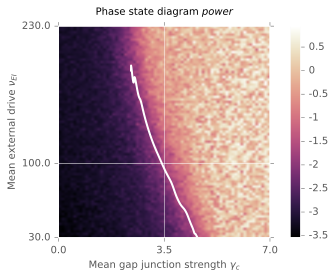

In [19]:
###################################
# bursting
###################################
fig = plt.figure(figsize=(6,4))
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
matplotlib.rc('axes', labelsize = 10)
matplotlib.rc('axes', titlesize = 10)
matplotlib.rc('lines', linewidth=2)
ax = fig.add_subplot(111)

dataframe = df[(df['freq']<1000)]
dataframe['logpower']= (dataframe['power']).apply(np.log10)
title = r'Phase state diagram $power$'
filename = "global_gap_junctions_bursting.pdf" 
column = 'logpower'

gr.plotDiagram(fig, ax, dataframe, title, column, filename, extent=extent)

df_sliced = dataframe[(dataframe['logpower']>-1.74) & (dataframe['logpower']<-1.50)]
contour = df_sliced[['gammaC','nuEI']].get_values()
yvals, xvals = gr.bezier_curve(contour, nTimes=100)
frontier = np.array([xvals,yvals])
plt.ylabel(r'Mean external drive $\nu_{EI}$')
plt.xlabel(r'Mean gap junction strength $\gamma_c$')
plt.plot(frontier[1,:], frontier[0,:], '-w', linewidth=2)
# plt.plot(contour[:,0], contour[:,1], '.')
# plt.plot(pt[:,1], pt[:,0], '.')
# cycle  = np.load(DIRECTORY + 'cycle.npy')
# plt.plot(cycle[:,0], cycle[:,1])
plt.savefig(DIRECTORY + 'bursting_phase_plan_cycle.pdf')

In [20]:
### FUNCTION to get values of gamma returning nearest value of power

# pt = np.zeros(shape=(100,2))
# for i in range(100):
#     da = dataframe[(dataframe['nuEI']==(2*i))]
#     da['logpower']= (da['power']).apply(np.log10)
#     try:
#         val = da[['logpower']].get_values()
#         pt[i,:]=[2*i,gr.find_nearest(val, -1.5,dataframe)[2]]
#     except: 
#         print(2*i)
#         pass

In [21]:
# # contour = np.array(contour)
# # yvals, xvals = bezier_curve(contour, nTimes=100)
# # frontier = np.array([xvals,yvals])

# # plt.plot(frontier[1,:], frontier[0,:], '-w', linewidth=2)
# # plt.plot(contour[:,0], contour[:,1], '.')

# frontgamma(60,frontier)
print(gr.fixpoint(df,100, 0.89, 5))

0


In [22]:
# for i in range(6):
#     print(np.mean(Z[i]))
    
# print(Z1[20])

In [23]:
# @autojit
def overunder(df, frontier, rule):
    '''
    return 0 if fixpoint over in the SYNC regime, 1 otherwise
    '''
    if rule in [0,1,5,3]:
        col = np.arange(0,2,0.05) #ratio for active rule
    else:
        col = np.arange(0,120,3) #ratio for passive rule
    row = np.arange(50,200,1) #nu
    Z = np.zeros(shape=(len(row),len(col)))
    for i,ratio in enumerate(col):
        for j, nuEI in enumerate(row):
            f= gr.fixpoint(df, nuEI, ratio, rule,5)
            border = gr.frontgamma(nuEI, frontier)
            Z[len(row)-1-j,len(col)-1-i] = (border-f)*((border>f) and (f>1) and (nuEI>48))*1.0
    return Z

Z = Parallel(n_jobs=num_cores)(delayed(overunder)(dataframe, frontier,i) for i in range(6))

Z1 = Z[1] # hardbound spiking
Z2 = Z[0] # softbound spiking
Z3 = Z[3] # spiking non bursting 
Z4 = Z[4] # hardbound passive rule
Z5 = Z[5] # hardbound spiking non bursting 
Zpassive = Z[2] # softbound passive rule (all non bursting neurons are potentiated)

##$ratio = \frac{LTD}{LTP}$

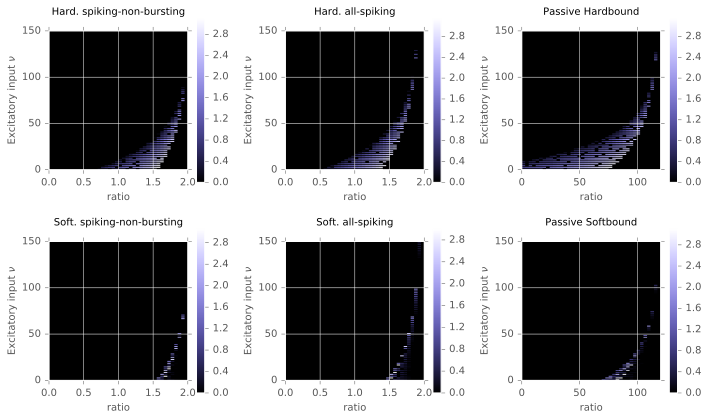

In [24]:
'''
Plot the \dot(gamma) as function of \gamma for hardbound
'''

matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
matplotlib.rc('axes', labelsize = 10)
matplotlib.rc('axes', titlesize = 10)
matplotlib.rc('lines', linewidth=2)

cx_blue = cubehelix.cmap(reverse=False, start=3., rot=0)

fig = plt.figure(figsize=(10,6))

extent1 = [0,2.0,0,150]
extent2 = [0,120,0,150]

ax6 = fig.add_subplot(232)
ax6.set_xlabel('ratio')
ax6.set_ylabel(r'Excitatory input $\nu$')
ax6.set_title('Hard. all-spiking', y=1.08)
# ax6.set_yticks([0,50,100,150])
# ax6.set_yticklabels([50,100,150,200])
cx4 = cubehelix.cmap(reverse=False, start=0., rot=0.5)
image = ax6.imshow(Z1, interpolation='nearest', extent=extent1,cmap=cx_blue, aspect=2/150)#, cmap =cx4)# drawing the function
plt.colorbar(image)

ax5 = fig.add_subplot(231)
ax5.set_xlabel('ratio')
ax5.set_ylabel(r'Excitatory input $\nu$')
ax5.set_title('Hard. spiking-non-bursting', y=1.08)
# ax5.set_yticks([0,50,100,150])
# ax5.set_yticklabels([50,100,150,200])
image = ax5.imshow(Z5, interpolation='nearest', extent=extent1, cmap=cx_blue, aspect=2/150)#, cmap =cx4)# drawing the function
plt.colorbar(image)

# plt.savefig(DIRECTORY + 'soft_vs_hard_all.pdf')

ax7 = fig.add_subplot(233)
ax7.set_xlabel('ratio')
ax7.set_ylabel(r'Excitatory input $\nu$')
ax7.set_title('Passive Hardbound', y=1.08)
# ax7.set_yticks([0,50,100,150])
# ax7.set_yticklabels([50,100,150,200])
cx4 = cubehelix.cmap(reverse=False, start=0., rot=0.5)
image = ax7.imshow(Z4, interpolation='nearest', extent=extent2,cmap=cx_blue, aspect=120/150)#, cmap =cx4)# drawing the function
plt.colorbar(image)
# plt.tight_layout()
# plt.savefig(DIRECTORY + 'hardbound.pdf')

'''
plot the \dot(gamma) as function of \gamma for hardbound and softbound eLTP and for two excitatory input levels
'''

ax6 = fig.add_subplot(235)
ax6.set_xlabel('ratio')
ax6.set_ylabel(r'Excitatory input $\nu$')
ax6.set_title('Soft. all-spiking', y=1.08)
# ax6.set_yticks([0,50,100,150])
# ax6.set_yticklabels([50,100,150,200])
cx4 = cubehelix.cmap(reverse=False, start=0., rot=0.5)
image = ax6.imshow(Z2, interpolation='nearest', extent=extent1,cmap=cx_blue, aspect=2/150)#, cmap =cx4)# drawing the function
plt.colorbar(image)

ax5 = fig.add_subplot(234)
ax5.set_xlabel('ratio')
ax5.set_ylabel(r'Excitatory input $\nu$')
ax5.set_title('Soft. spiking-non-bursting', y=1.08)
# ax5.set_yticks([0,50,100,150])
# ax5.set_yticklabels(tk)
image = ax5.imshow(Z3, interpolation='nearest', extent=extent1, cmap=cx_blue, aspect=2/150)#, cmap =cx4)# drawing the function
plt.colorbar(image)

ax7 = fig.add_subplot(236)
ax7.set_xlabel('ratio')
ax7.set_ylabel(r'Excitatory input $\nu$')
ax7.set_title('Passive Softbound', y=1.08)
# ax7.set_yticks([0,50,100,150])
# ax7.set_yticklabels(tk)
cx4 = cubehelix.cmap(reverse=False, start=0., rot=0.5)
image = ax7.imshow(Zpassive, interpolation='nearest', extent=extent2,cmap=cx_blue, aspect=120/150)#, cmap =cx4)# drawing the function
plt.colorbar(image)
plt.tight_layout()
plt.savefig(DIRECTORY + 'soft_hard_horizontal.pdf')

## Position of the FP($\gamma$) for a fixed ratio

/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


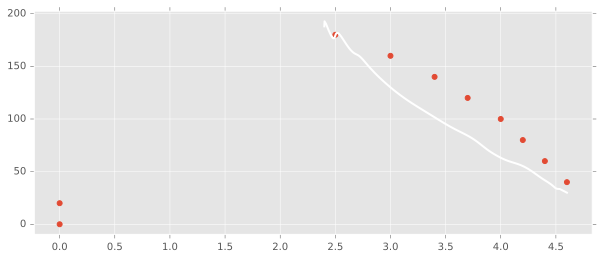

In [25]:
def overunder(df, frontier,rule):
    '''
    return 0 if fixpoint over in the SYNC regime, 1 otherwise
    '''
    ratio = 0.05 #ratio for active rule

    row = np.arange(0,200,20) #nu
    Z = []
    dist = []
    
    for j, nuEI in enumerate(row):
        f= gr.fixpoint(df, nuEI, ratio, rule)
        border = gr.frontgamma(nuEI, frontier)
        dist.append(border-f)
        Z.append(f)
    return Z, dist

Z,dist = overunder(dataframe, frontier,0)
# Z1 = Z[1] # hardbound spiking
# Z2 = Z[0] # softbound spiking
# Z3 = Z[3] # spiking non bursting 
# Z4 = Z[4] # hardbound passive rule
# Z5 = Z[5] # hardbound spiking non bursting 
plt.plot(Z,np.arange(0,200,20),'.',markersize=10, linewidth=4)
plt.plot(frontier[1,:], frontier[0,:], '-w', linewidth=2)

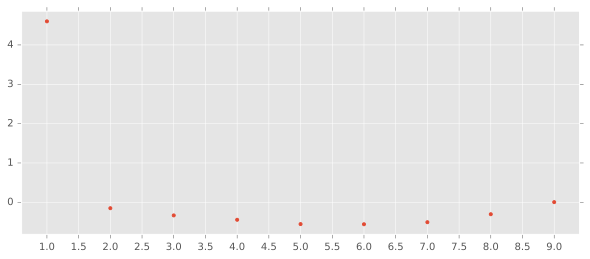

In [26]:
plt.plot(dist,'.')